# Who are the researchers doing research on sustainability, overlapping but not collaborating ?
--------------

In [182]:
%load_ext autoreload
%autoreload 2

from collaboration import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define usefull variables

In [2]:
concept = 'Sustainability'
alpha = 1

## Get all direct neighbours, ie neighbours that have an edge with Sustainability that have a normalized score greater than 0.2

In [3]:
neighbours = get_neighbours(concept_string_to_id(concept))

## Gett all nodes that are at a distance alpha 

In [4]:
l = create_graph(concept, alpha)

## Create graph and add node Sustainability

In [5]:
G = nx.Graph()
G.add_node(concept_string_to_id('Sustainability'), label='Concept')

## Add other nodes to graph

In [6]:
# Add concepts that are at one physical hop from sustainability
for neighbour, score in neighbours:
    G.add_node(neighbour, label='Concept')

In [7]:
# Add concepts that are at alpha distance in trem of weight from sustainability
for neighbour in l:
    G.add_node(neighbour, label='Concept')

## Add edges between nodes

In [8]:
get_concept_edges(G)

## Add person nodes and their edges linking them to concepts

In [14]:
add_prof(G)

<bound method Graph.number_of_nodes of <networkx.classes.graph.Graph object at 0x7f71aca40320>>


In [111]:
prof = [n for n in G.nodes() if G.nodes[n]['label'] == 'Person']
concept = [n for n in G.nodes() if G.nodes[n]['label'] == 'Concept']
print("profs : ", len(prof), "\nconcepts : ", len(concept))

prof :  2760 
concept :  5107 
publi :  0


## Select a random prof

In [218]:
p = random.choice(prof)

## Computes metrics

In [219]:
pageranks = pagerank(G, damping= 0.85, central_node=p)

In [220]:
tmp = prof[:]
tmp.remove(p)
path = dijkstra_nx(G, p, tmp)

In [221]:
collabs = get_collab(p, prof, pageranks, path)

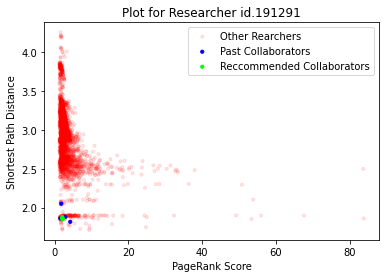

In [222]:
plot_p(p, collabs)